In [ ]:
!pip install geopandas folium

In [ ]:
import pandas as pd
import numpy as np
import random
import os
from tqdm.notebook import tqdm
import geopandas as gpd
from shapely.geometry import Point
import folium
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
pd.options.display.float_format = '{:.5f}'.format
pd.options.display.max_rows = None
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
SEED = 2023
random.seed(SEED)
np.random.seed(SEED)

In [ ]:
data = pd.read_csv("/content/climate_nasa (1).csv")

In [ ]:
data.head()

,date,likesCount,profileName,commentsCount,text
0,2022-09-07T17:12:32.000Z,2,4dca617d86b3fdce80ba7e81fb16e048c9cd9798cdfd6d...,NaN,Neat comparison I have not heard it before.\n ...
1,2022-09-08T14:51:13.000Z,0,518ab97f2d115ba5b6f03b2fba2ef2b120540c9681288b...,NaN,An excellent way to visualise the invisible! T...
2,2022-09-07T17:19:41.000Z,1,d82e8e24eb633fd625b0aef9b3cb625cfb044ceb8483e1...,3.0,Does the CO2/ghg in the troposphere affect the...
3,2022-09-08T00:51:30.000Z,4,37a509fa0b5177a2233c7e2d0e2b2d6916695fa9fba3f2...,NaN,excellent post! I defo feel the difference - o...
4,2022-09-07T19:06:20.000Z,16,e54fbbd42a729af9d04d9a5cc1f9bbfe8081a31c219ecb...,26.0,"Yes, and carbon dioxide does not harm the Eart..."


In [ ]:
print("Shape of dataset:", data.shape)

Shape of dataset: (522, 5)


In [ ]:
data.describe()

,likesCount,commentsCount
count,522.00000,244.00000
mean,4.72031,8.69672
std,12.05356,12.26618
min,0.00000,1.00000
25%,0.00000,2.00000
50%,1.00000,5.00000
75%,4.00000,10.00000
max,126.00000,93.00000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522 entries, 0 to 521
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           522 non-null    object 
 1   likesCount     522 non-null    int64  
 2   profileName    522 non-null    object 
 3   commentsCount  244 non-null    float64
 4   text           504 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 20.5+ KB


In [ ]:
data.isnull().sum()

,0
date,0
likesCount,0
profileName,0
commentsCount,278
text,18


In [ ]:
df = data.dropna()
print("After dropping missing values:", df.shape)

After dropping missing values: (242, 5)


In [ ]:
X = data.drop(columns=['likesCount', 'date', 'text', 'profileName'])
y = data['likesCount']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
model = RandomForestRegressor(random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
y_pred = model.predict(X_test_scaled)

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
print(f"\nModel Performance:")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R2: {r2:.2f}")


Model Performance:
MAE: 5.55
MSE: 154.17
R2: 0.14


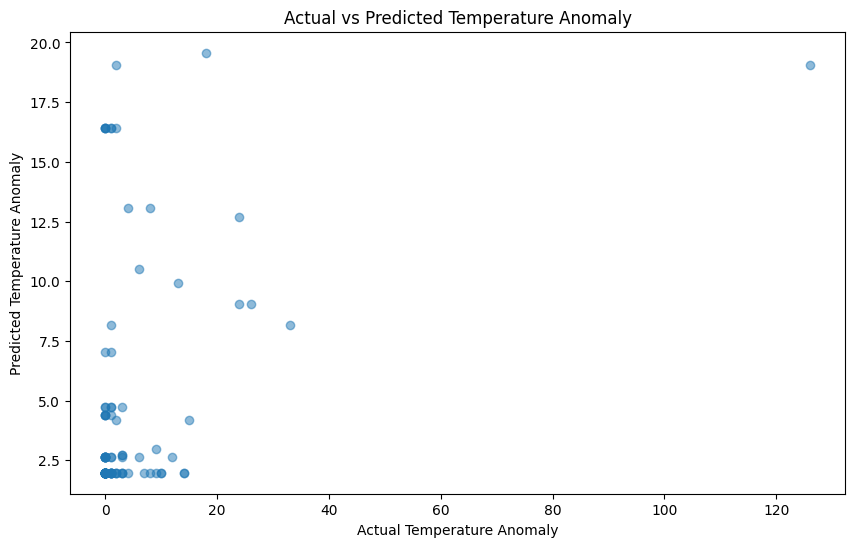

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Temperature Anomaly')
plt.ylabel('Predicted Temperature Anomaly')
plt.title('Actual vs Predicted Temperature Anomaly')
plt.show()

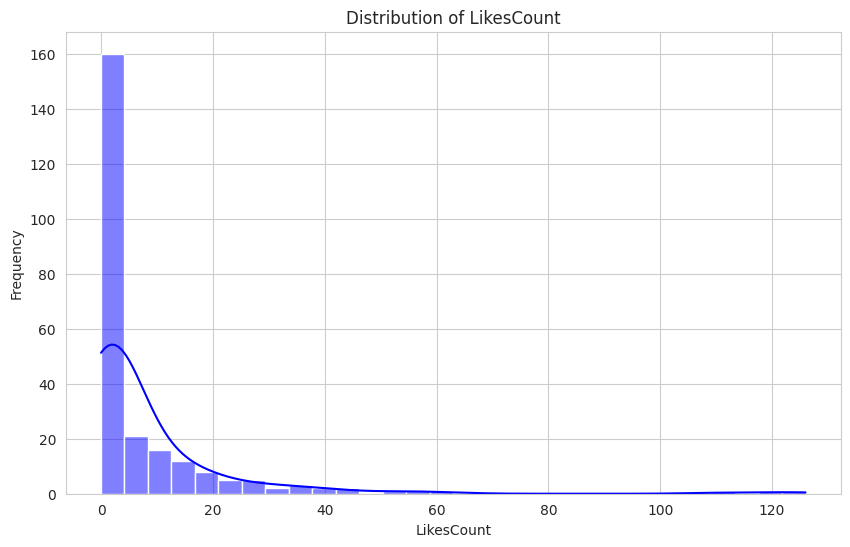

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
sns.histplot(df['likesCount'], kde=True, bins=30, color= 'blue')
plt.title("Distribution of LikesCount")
plt.xlabel("LikesCount")
plt.ylabel("Frequency")
plt.show()

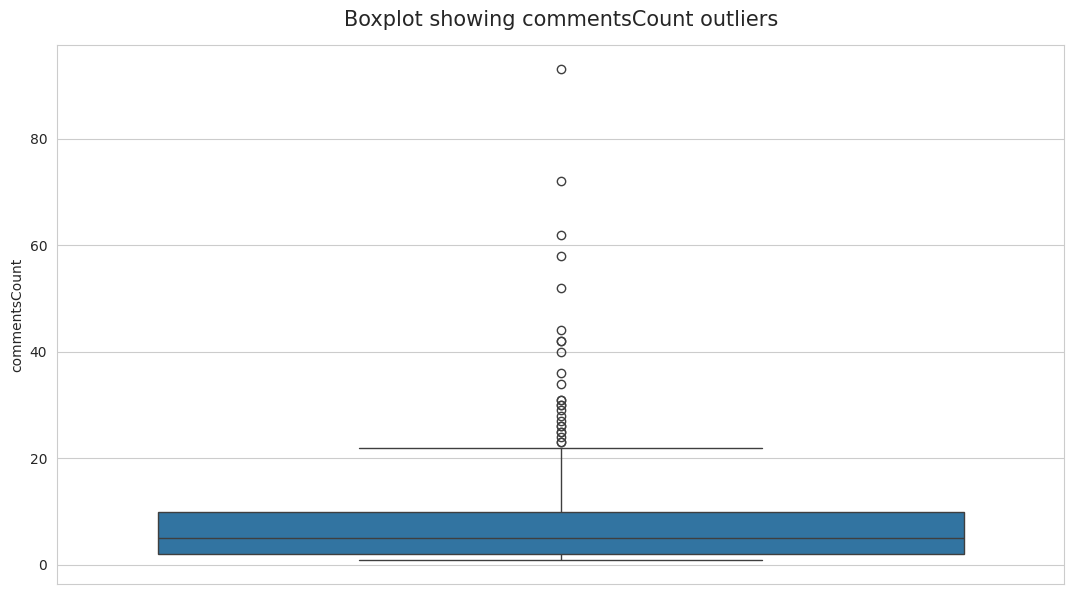

In [ ]:
plt.figure(figsize = (13, 7))
sns.boxplot(df.commentsCount)
plt.title('Boxplot showing commentsCount outliers', y = 1.02,
fontsize = 15)
plt.show()

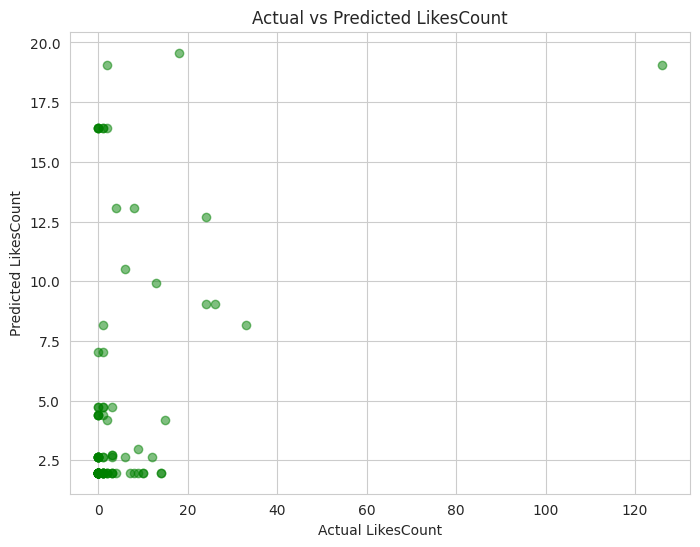

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5, color='green')
plt.xlabel("Actual LikesCount")
plt.ylabel("Predicted LikesCount")
plt.title("Actual vs Predicted LikesCount")
plt.grid(True)
plt.show()

In [ ]:
Future_data = X_test[:10]
future_scaled = scaler.transform(Future_data)
future_preds = model.predict(future_scaled)
print("\nFuture Predictions (first 10 rows):")
print(future_preds)


Future Predictions (first 10 rows):
[1.97768322 4.39232357 1.97768322 4.73029366 1.97768322 1.97768322
 2.64709471 1.97768322 1.97768322 2.64709471]


In [ ]:
df['latitude'] = np.random.uniform(-1.0, 1.0, size=len(df))
df['longitude'] = np.random.uniform(29.0, 31.0, size=len(df))

In [ ]:
df_unique = df.drop_duplicates(subset=['latitude', 'longitude']).copy()
df_unique['set_type'] = 'train'

In [ ]:
geometry = gpd.points_from_xy(df_unique.longitude, df_unique.latitude)
geo_df = gpd.GeoDataFrame(df_unique[['latitude', 'longitude', 'set_type']], geometry=geometry)

In [ ]:
all_data_map = folium.Map(prefer_canvas=True, zoom_start=2)

In [ ]:
i = 0
geo_df_list = [[point.y, point.x] for point in geo_df.geometry ]
for coordinates in geo_df_list:
  if geo_df.set_type.iloc[i] == "train":
    type_color = "green"
  elif geo_df.set_type.iloc[i] == "test":
    type_color  ="orange"

  all_data_map.add_child(
      folium.CircleMarker(
          location=coordinates,
          radius=1,
          weight=2,
          zoom=10,
          popup=(
              "Set: " + str(geo_df.set_type.iloc[i]) + "<br>" +
              "Coordinates: " + str([round(x, 2) for x in geo_df_list[i]])
          ),
      )
  )
  i += 1

In [ ]:
all_data_map.fit_bounds(all_data_map.get_bounds())
all_data_map

In [ ]:
print("Missing values in X_train:", X_train.isnull().sum().any())
print("Missing values in X_test:", X_test.isnull().sum().any())
print("Missing values in y_train:", y_train.isnull().sum().any())
print("Missing values in y_test:", y_test.isnull().sum().any())

Missing values in X_train: True
Missing values in X_test: True
Missing values in y_train: False
Missing values in y_test: False


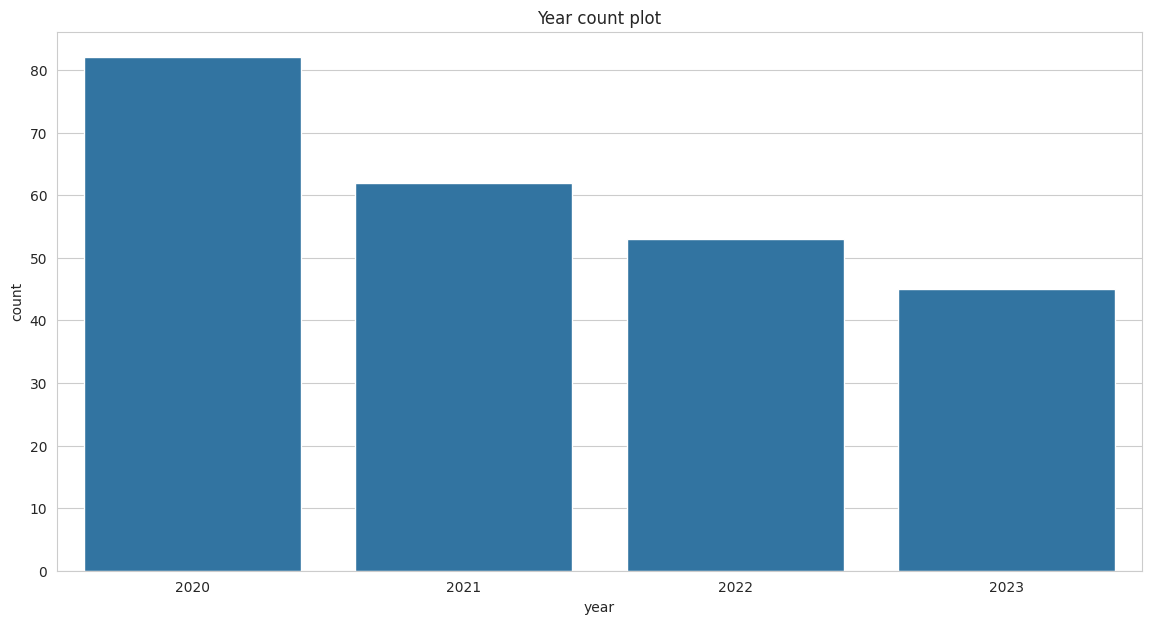

In [ ]:
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
plt.figure(figsize = (14, 7))
sns.countplot(x = 'year', data = df)
plt.title('Year count plot')
plt.show()